In [2]:
########## EDA - 1 BIKE DETAILS ###############

from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [7]:
import pandas as pd

# CSV file ko read karo
df = pd.read_csv('BIKE DETAILS.csv')

# Data ke top 5 rows dekho
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [8]:
# Que 1 What is the range of selling prices in the dataset?
# Maximum and minimum selling price
max_price = df['selling_price'].max()
min_price = df['selling_price'].min()

# Range calculation
price_range = max_price - min_price

print("Maximum Selling Price:", max_price)
print("Minimum Selling Price:", min_price)
print("Range of Selling Prices:", price_range)


Maximum Selling Price: 760000
Minimum Selling Price: 5000
Range of Selling Prices: 755000


In [10]:
#Que 2  What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print("Median Selling Price:", median_price)


Median Selling Price: 45000.0


In [11]:
 #Que 3 What is the most common seller type?
most_common_seller = df['seller_type'].value_counts()
print("Seller Type Counts:\n", most_common_seller)

# Optional: Just show the most common one
print("\nMost Common Seller Type:", most_common_seller.idxmax())


Seller Type Counts:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

Most Common Seller Type: Individual


In [12]:
#Que 4 How many bikes have driven more than 50,000 kilometers?
more_than_50k = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes driven more than 50,000 km:", more_than_50k)


Number of bikes driven more than 50,000 km: 170


In [14]:
#Que 5 avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:\n", avg_km_by_owner)



Average km_driven for each ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [15]:
#Que 6 What proportion of bikes are from the year 2015 or older?
# Total bikes
total_bikes = df.shape[0]

# Bikes from 2015 or older
older_bikes = df[df['year'] <= 2015].shape[0]

# Proportion calculation
proportion = older_bikes / total_bikes

print("Total bikes:", total_bikes)
print("Bikes from year 2015 or older:", older_bikes)
print("Proportion of bikes from 2015 or older:", round(proportion, 4))  # Rounded to 4 decimals


Total bikes: 1061
Bikes from year 2015 or older: 601
Proportion of bikes from 2015 or older: 0.5664


In [16]:
#Que 7 What is the trend of missing values across the dataset?
# Missing values count in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


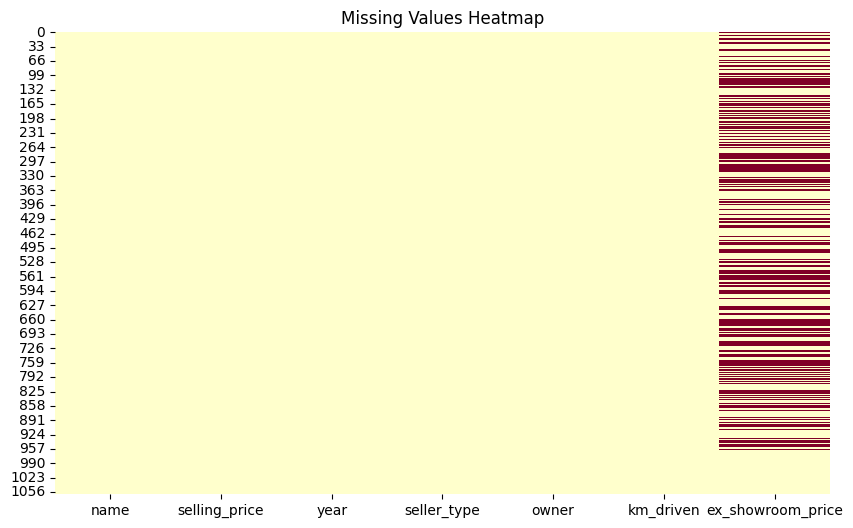

In [17]:
#Heatmap Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Missing Values Heatmap")
plt.show()


In [18]:
#Que 8  What is the highest ex_showroom_price recorded, and for which bike?
# Index of highest ex_showroom_price
idx = df['ex_showroom_price'].idxmax()

# Get that row
highest_price_bike = df.loc[idx]

# Show result
print("Highest Ex-Showroom Price:", highest_price_bike['ex_showroom_price'])
print("Bike Name:", highest_price_bike['name'])


Highest Ex-Showroom Price: 1278000.0
Bike Name: Harley-Davidson Street Bob


In [19]:
#Que 9 What is the total number of bikes listed by each seller type?
seller_counts = df['seller_type'].value_counts()
print("Total bikes listed by each seller type:\n", seller_counts)


Total bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


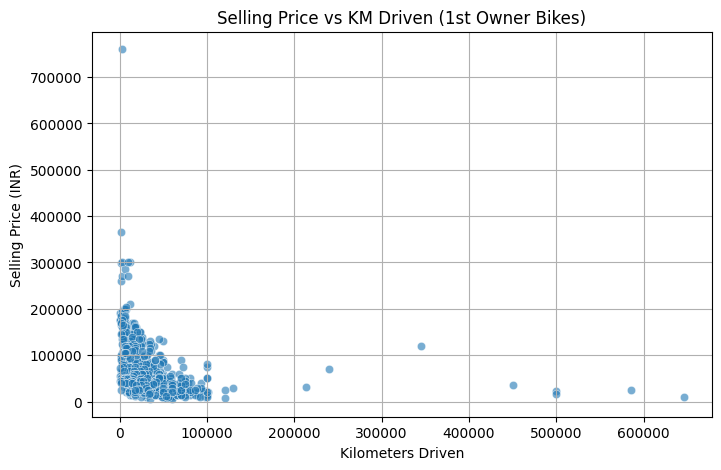

In [20]:
#Que 10  What is the relationship between selling_price and km_driven for first-owner bikes?
import seaborn as sns
import matplotlib.pyplot as plt

# Filter first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.6)
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.grid(True)
plt.show()


In [21]:
#Que 11  Identify and remove outliers in the km_driven column using the IQR method?
# Step 1: Calculate Q1, Q3, IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Print summary
print("Original dataset size:", df.shape[0])
print("After removing outliers:", df_no_outliers.shape[0])
print("Total outliers removed:", df.shape[0] - df_no_outliers.shape[0])



Original dataset size: 1061
After removing outliers: 1022
Total outliers removed: 39


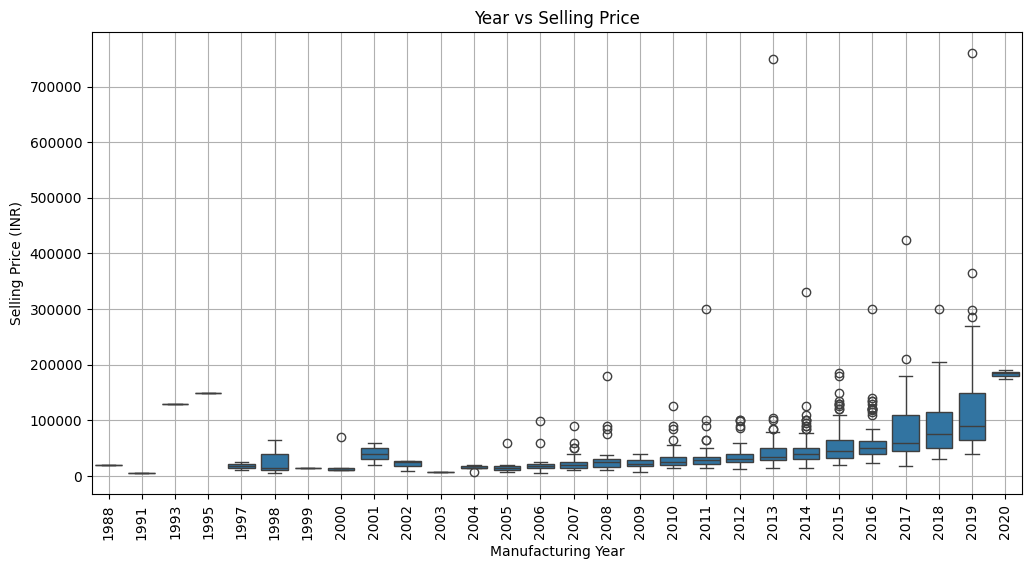

In [22]:
#Que 12 Perform a bivariate analysis to visualize the relationship between year and selling_price?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Year vs Selling Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.grid(True)
plt.show()


In [23]:
#Que 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year)?
# Step 1: Set current year
current_year = 2025

# Step 2: Create 'age' column
df['age'] = current_year - df['year']

# Step 3: Remove rows with missing ex_showroom_price
df_clean = df.dropna(subset=['ex_showroom_price'])

# Step 4: Calculate depreciation
df_clean['depreciation'] = df_clean['ex_showroom_price'] - df_clean['selling_price']

# Step 5: Group by age and calculate average depreciation
avg_depreciation_by_age = df_clean.groupby('age')['depreciation'].mean()
print("Average Depreciation by Bike Age:\n", avg_depreciation_by_age)



Average Depreciation by Bike Age:
 age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64


/tmp/ipython-input-23-3815390827.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['depreciation'] = df_clean['ex_showroom_price'] - df_clean['selling_price']


In [24]:
#Que 14 Which bike names are priced significantly above the average price for their manufacturing year?
# Step 1: Calculate average selling_price for each year
year_avg = df.groupby('year')['selling_price'].mean().reset_index()
year_avg.rename(columns={'selling_price': 'avg_year_price'}, inplace=True)

# Step 2: Merge with original dataframe
merged_df = df.merge(year_avg, on='year')

# Step 3: Filter bikes priced above average for their year
above_avg_bikes = merged_df[merged_df['selling_price'] > merged_df['avg_year_price']]

# Step 4: Show results
print("Bikes priced above average for their year:\n")
print(above_avg_bikes[['name', 'year', 'selling_price', 'avg_year_price']].sort_values(by='year'))


Bikes priced above average for their year:

                                     name  year  selling_price  avg_year_price
715                            Yamaha RXG  1997          25000    17500.000000
554                          Yamaha RX135  1998          65000    28333.333333
306                             Yamaha Rx  2000          70000    20833.333333
837  Royal Enfield Bullet 350 [2007-2011]  2001          60000    40000.000000
885                           TVS Max DLX  2002          26000    20666.666667
..                                    ...   ...            ...             ...
964             Royal Enfield Classic 350  2019         135000   119689.511628
0               Royal Enfield Classic 350  2019         175000   119689.511628
96                            Yamaha FZ25  2019         150000   119689.511628
14                                Jawa 42  2020         185000   183333.333333
136   Royal Enfield Classic Gunmetal Grey  2020         190000   183333.333333

[334 ro

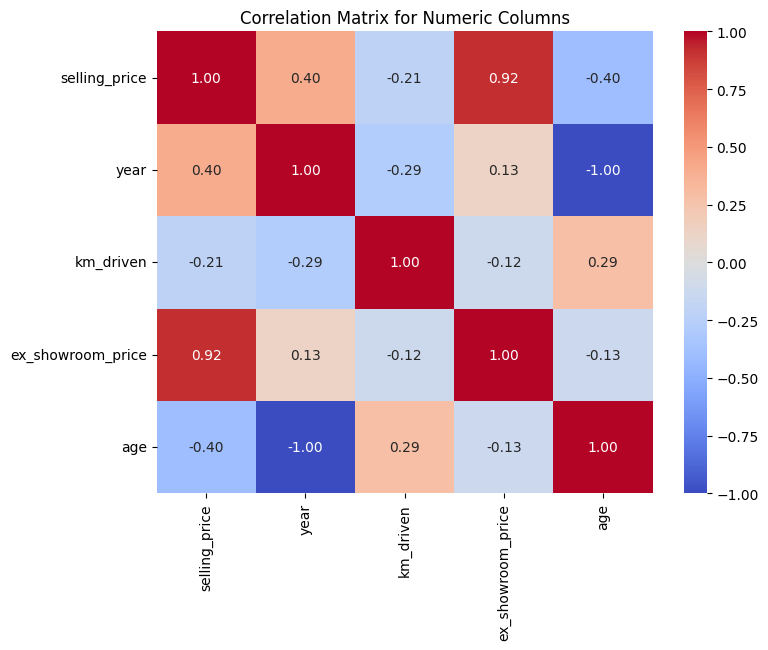

In [25]:
#Que 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap?
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Columns")
plt.show()


In [26]:
############# EDA-2 CARS SALES #####################




from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [33]:
import pandas as pd

# CSV file ko read karo
df = pd.read_csv('Car Sale.csv')

# Data ke top 5 rows dekho
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Top 10 dealers by average price:
 Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64


/tmp/ipython-input-34-3589990199.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_dealer.values, y=avg_price_by_dealer.index, palette='viridis')


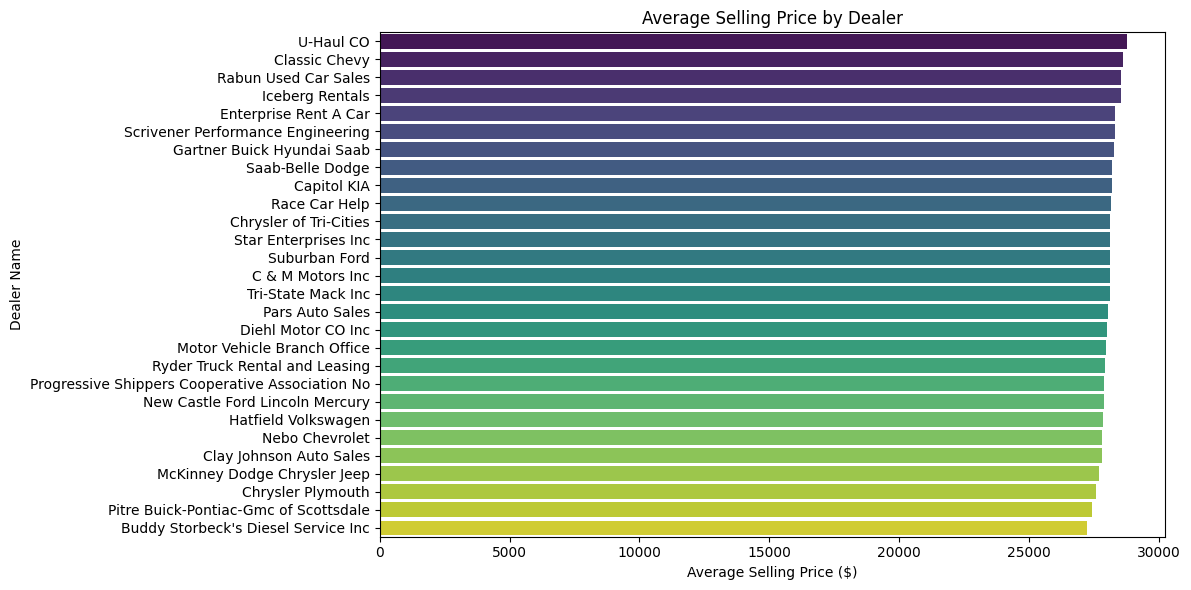

In [34]:
#Que 1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average selling price for each dealer
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Print top 10 for quick view
print("Top 10 dealers by average price:\n", avg_price_by_dealer.head(10))

# Barplot for visualization
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_dealer.values, y=avg_price_by_dealer.index, palette='viridis')
plt.xlabel("Average Selling Price ($)")
plt.ylabel("Dealer Name")
plt.title("Average Selling Price by Dealer")
plt.tight_layout()
plt.show()


Top 10 companies with highest price variation:
 Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64


/tmp/ipython-input-35-770692011.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_variation.values, y=price_variation.index, palette='magma')


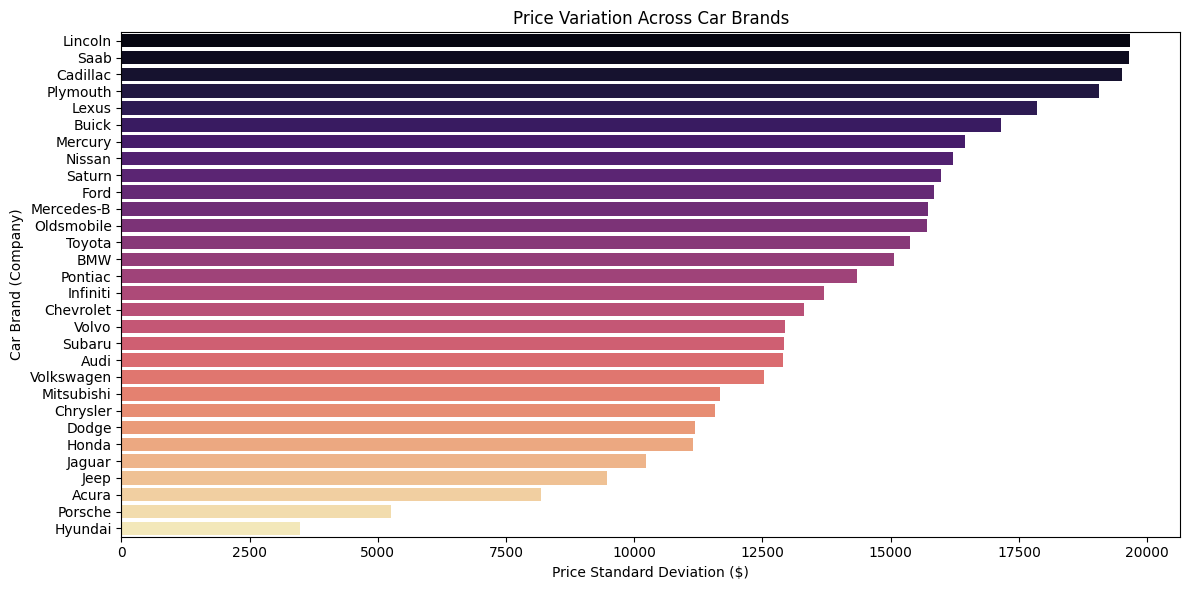

In [35]:
#Que 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#      trends?

# Standard deviation of prices by company
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Print top 10 companies with highest price variation
print("Top 10 companies with highest price variation:\n", price_variation.head(10))

# Optional: Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=price_variation.values, y=price_variation.index, palette='magma')
plt.xlabel("Price Standard Deviation ($)")
plt.ylabel("Car Brand (Company)")
plt.title("Price Variation Across Car Brands")
plt.tight_layout()
plt.show()


/tmp/ipython-input-36-1180100710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')


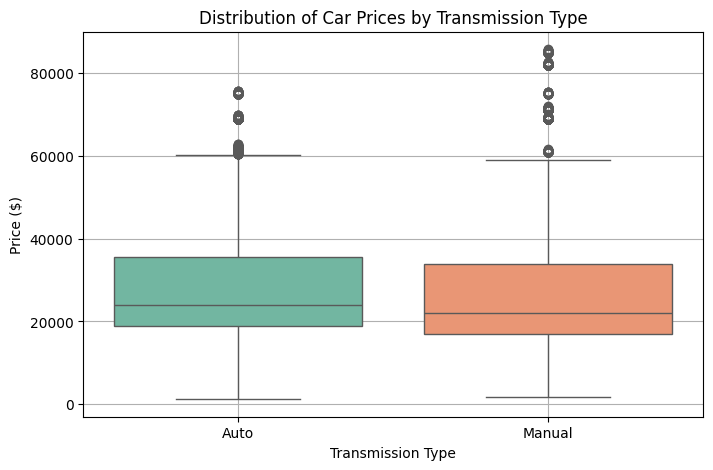

In [36]:
#Que 3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Transmission vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


/tmp/ipython-input-37-3439425669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='coolwarm')


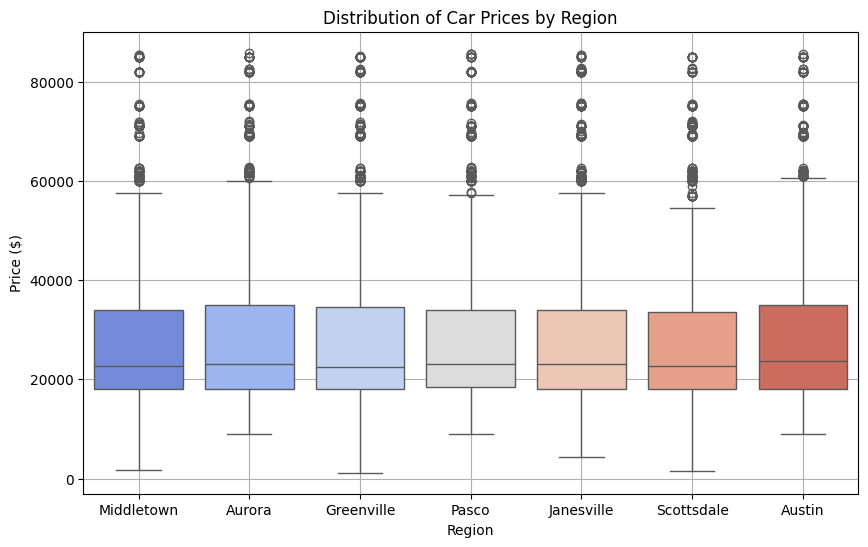

In [37]:
#Que 4 What is the distribution of car prices across different regions?
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Price by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='coolwarm')
plt.title("Distribution of Car Prices by Region")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


/tmp/ipython-input-38-2190531629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Body Style', order=df['Body Style'].value_counts().index, palette='pastel')


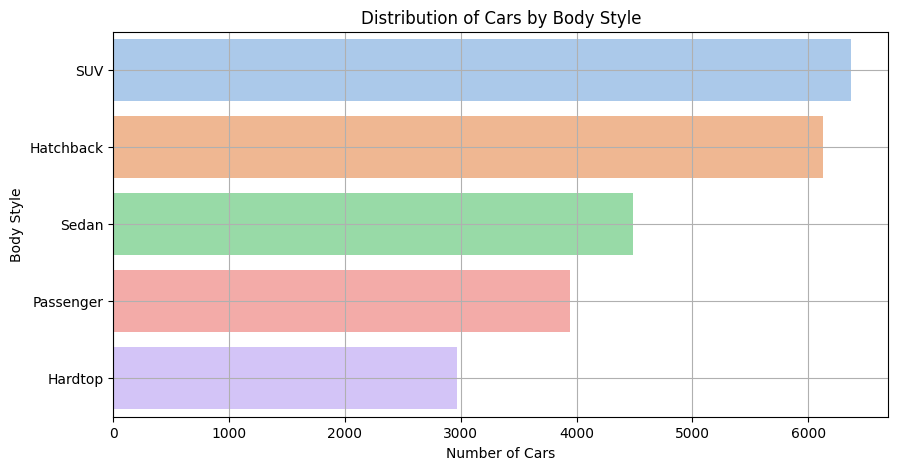

In [38]:
#Que 5 What is the distribution of cars based on body styles?
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of body styles
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Body Style', order=df['Body Style'].value_counts().index, palette='pastel')
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Number of Cars")
plt.ylabel("Body Style")
plt.grid(True)
plt.show()


In [39]:
#Que 6 How does the average selling price of cars vary by customer gender and annual income?
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()
print("Average Price by Gender:\n", avg_price_gender)


Average Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


/tmp/ipython-input-40-3518927388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Price ($)', palette='Set3')


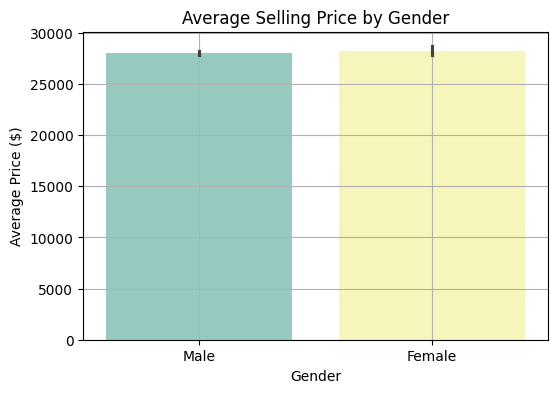

In [40]:
#Visualize Gender vs Price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Price ($)', palette='Set3')
plt.title("Average Selling Price by Gender")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()


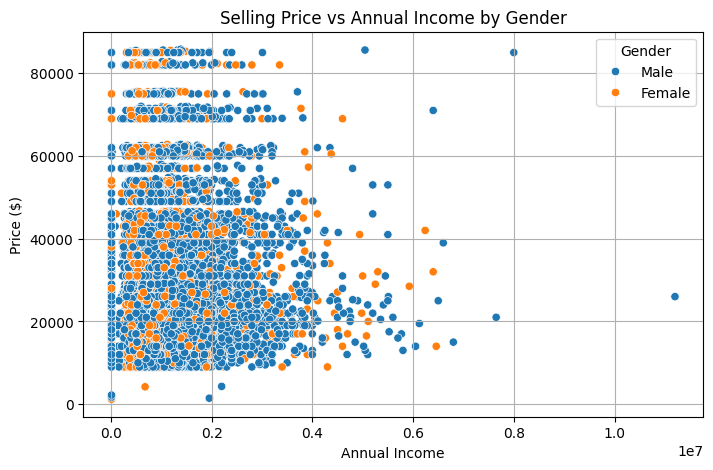

In [41]:
#: Income vs Price Trend (Scatterplot or Line)
# Optionally group income into bins if data is large
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender')
plt.title("Selling Price vs Annual Income by Gender")
plt.grid(True)
plt.show()





/tmp/ipython-input-42-2485072665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='coolwarm')


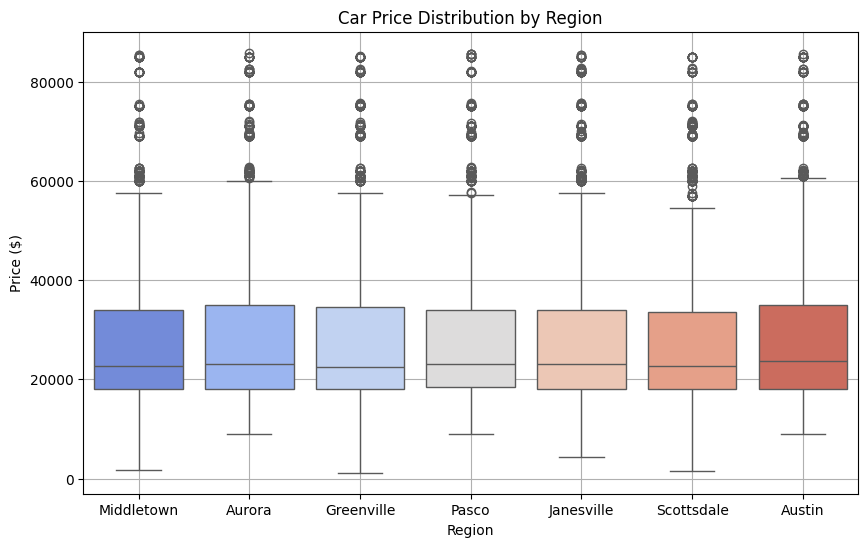

In [42]:
#Que 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?

#Price Distribution by Region (Boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='coolwarm')
plt.title("Car Price Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


/tmp/ipython-input-43-2829999318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dealer_Region', palette='pastel', order=df['Dealer_Region'].value_counts().index)


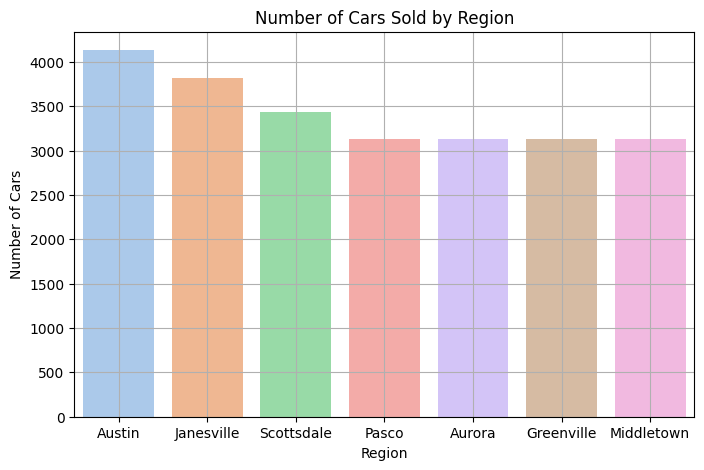

In [43]:
 # Number of Cars Sold by Region (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dealer_Region', palette='pastel', order=df['Dealer_Region'].value_counts().index)
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()


In [44]:
#Que 8 How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average Price by Engine Type:\n", avg_price_by_engine)


Average Price by Engine Type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


/tmp/ipython-input-45-2056832407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_engine.values, y=avg_price_by_engine.index, palette='Spectral')


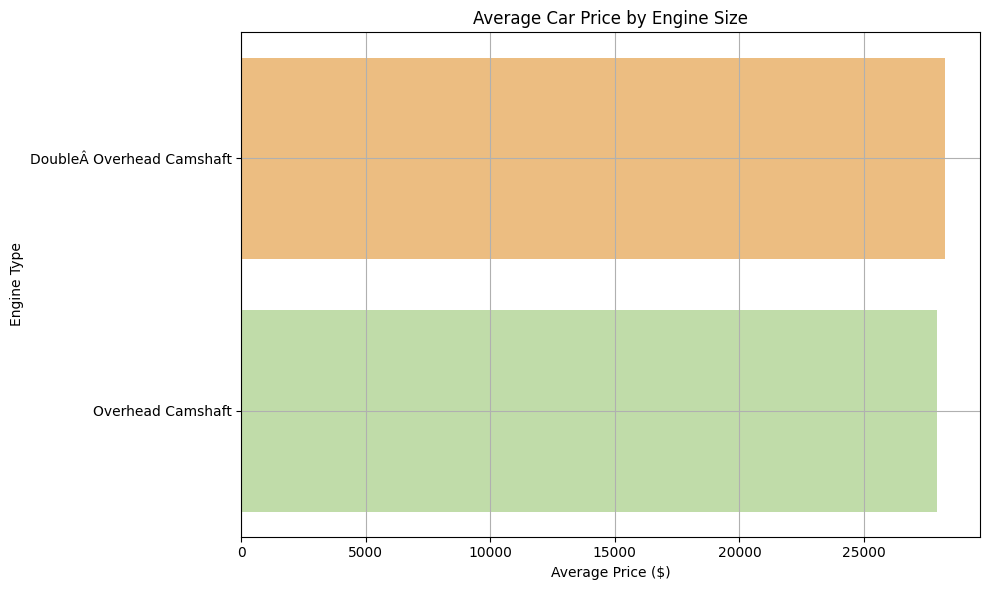

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_engine.values, y=avg_price_by_engine.index, palette='Spectral')
plt.xlabel("Average Price ($)")
plt.ylabel("Engine Type")
plt.title("Average Car Price by Engine Size")
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
#Que 9 How do car prices vary based on the customer’s annual income bracket?
# Create income bins
bins = [0, 25000, 50000, 75000, 100000, 150000, df['Annual Income'].max()]
labels = ['0–25K', '25K–50K', '50K–75K', '75K–100K', '100K–150K', '150K+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)


In [48]:
avg_price_by_income = df.groupby('Income_Bracket')['Price ($)'].mean()
print("Average Car Price by Income Bracket:\n", avg_price_by_income)


Average Car Price by Income Bracket:
 Income_Bracket
0–25K        27884.297820
25K–50K               NaN
50K–75K               NaN
75K–100K     43000.000000
100K–150K    23200.200000
150K+        28149.089557
Name: Price ($), dtype: float64


/tmp/ipython-input-48-1199500241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income_Bracket')['Price ($)'].mean()


/tmp/ipython-input-49-3017103054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette='coolwarm')


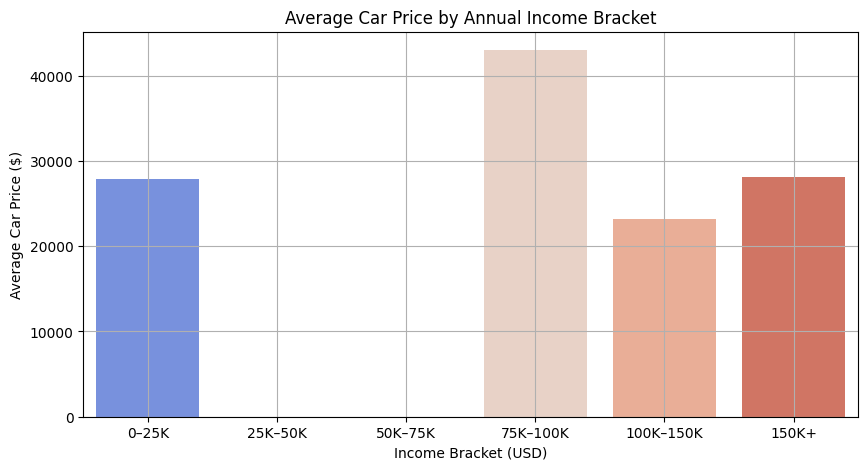

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette='coolwarm')
plt.title("Average Car Price by Annual Income Bracket")
plt.xlabel("Income Bracket (USD)")
plt.ylabel("Average Car Price ($)")
plt.grid(True)
plt.show()


In [50]:
#Que 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df['Model'].value_counts().nlargest(5).index.tolist()
print("Top 5 Most Sold Car Models:\n", top_5_models)


Top 5 Most Sold Car Models:
 ['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup']


In [52]:
df_top_models = df[df['Model'].isin(top_5_models)] #filter


/tmp/ipython-input-53-3154030778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_models, x='Model', y='Price ($)', palette='Set2')


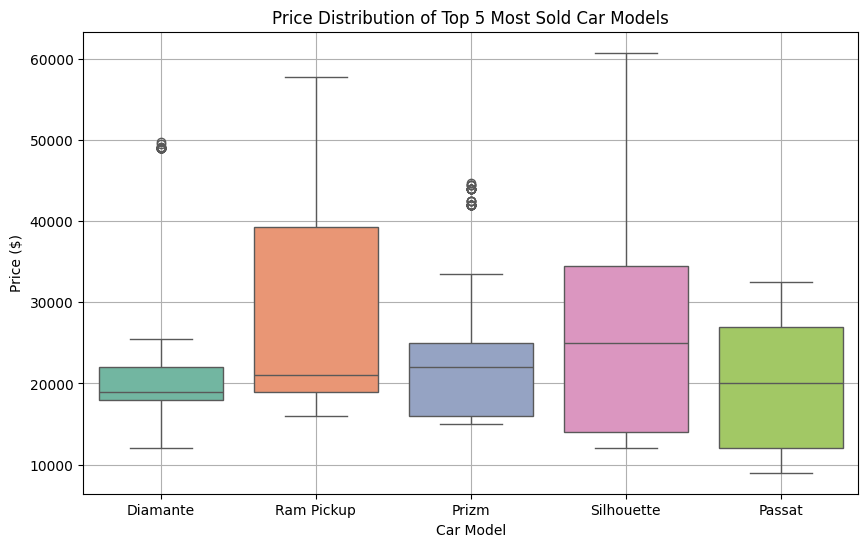

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_models, x='Model', y='Price ($)', palette='Set2')
plt.title("Price Distribution of Top 5 Most Sold Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


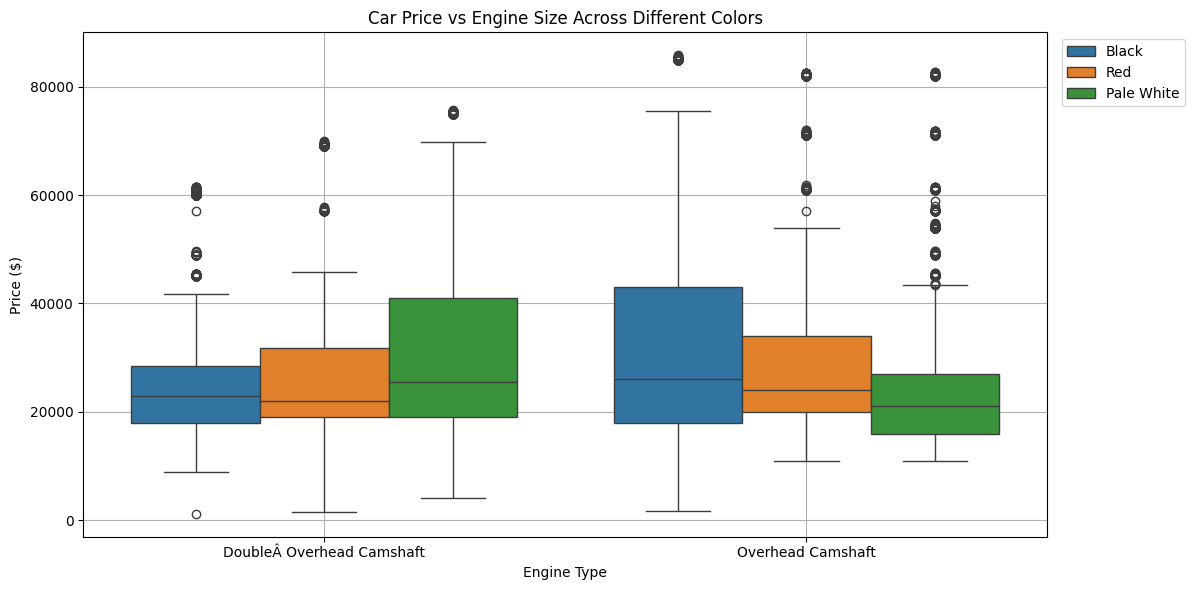

In [54]:
#Que 11 How does car price vary with engine size across different car colors, and which colors have the highest price
# variation?

#Boxplot — Engine Size vs Price across Colors

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Engine', y='Price ($)', hue='Color')
plt.title("Car Price vs Engine Size Across Different Colors")
plt.xlabel("Engine Type")
plt.ylabel("Price ($)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
#Find Which Color Has Highest Price Variation

# Standard deviation of price grouped by color
price_std_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

print("Price Variation (Std Dev) by Color:\n", price_std_by_color)


Price Variation (Std Dev) by Color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


/tmp/ipython-input-56-562315608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_std_by_color.values, y=price_std_by_color.index, palette='Spectral')


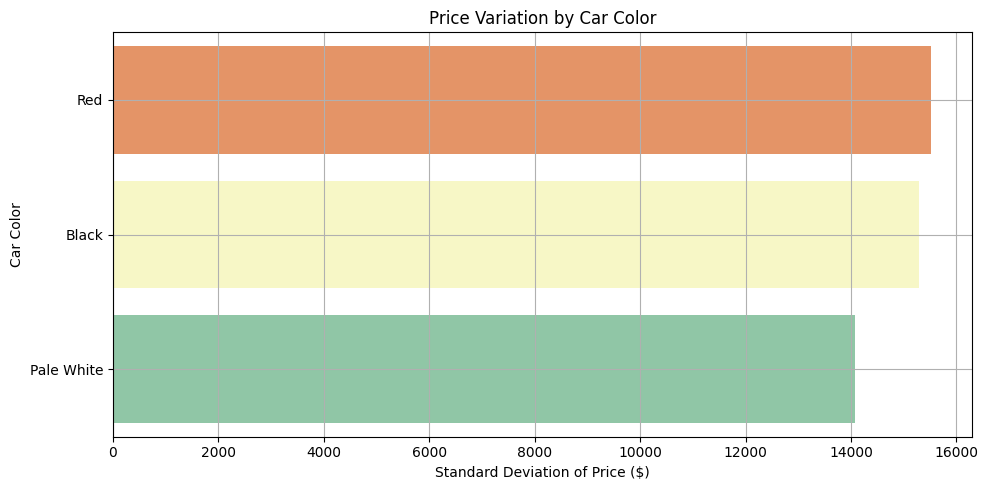

In [56]:
# Bar Plot of Price Variation by Color

plt.figure(figsize=(10, 5))
sns.barplot(x=price_std_by_color.values, y=price_std_by_color.index, palette='Spectral')
plt.title("Price Variation by Car Color")
plt.xlabel("Standard Deviation of Price ($)")
plt.ylabel("Car Color")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
#Que 12 Is there any seasonal trend in car sales based on the date of sale?

#Convert Date Column to Date Format & Extract Month
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month
df['Month'] = df['Date'].dt.month


In [58]:
#Count Cars Sold per Month
monthly_sales = df['Month'].value_counts().sort_index()
print("Monthly Car Sales:\n", monthly_sales)


Monthly Car Sales:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


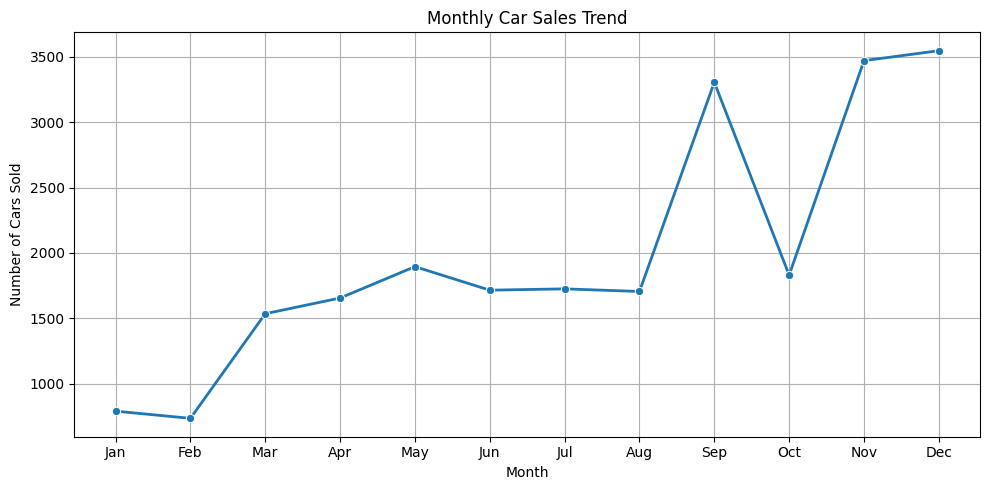

In [59]:
# Visualize Monthly Sales Trend

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2)
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


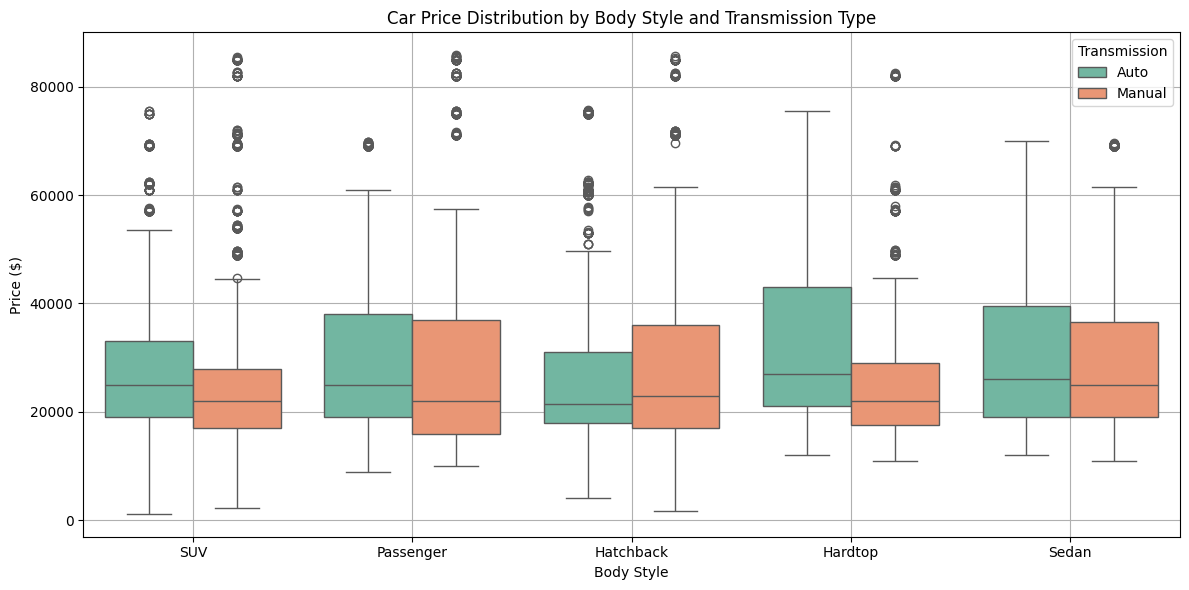

In [60]:
#Que 13  How does the car price distribution change when considering different combinations of body style and
#     transmission type?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.legend(title="Transmission")
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
avg_price_combo = df.groupby(['Body Style', 'Transmission'])['Price ($)'].mean().unstack()
print("Average Price by Body Style and Transmission:\n", avg_price_combo)


Average Price by Body Style and Transmission:
 Transmission          Auto        Manual
Body Style                              
Hardtop       31520.188210  27016.943698
Hatchback     25910.544824  28702.550562
Passenger     28915.835149  28969.521039
SUV           27501.404407  26079.019161
Sedan         29955.294344  29664.271572


In [63]:
#Que 14 What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact?
# Optional: Map engine types to numbers (example: I4 → 4, V6 → 6, V8 → 8)
df['Engine_numeric'] = df['Engine'].str.extract('(\d+)').astype(float)


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


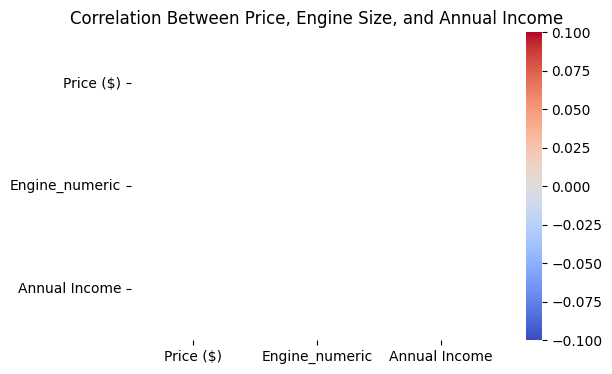

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numeric columns
corr_df = df[['Price ($)', 'Engine_numeric', 'Annual Income']].dropna()

# Correlation matrix
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Price, Engine Size, and Annual Income")
plt.show()


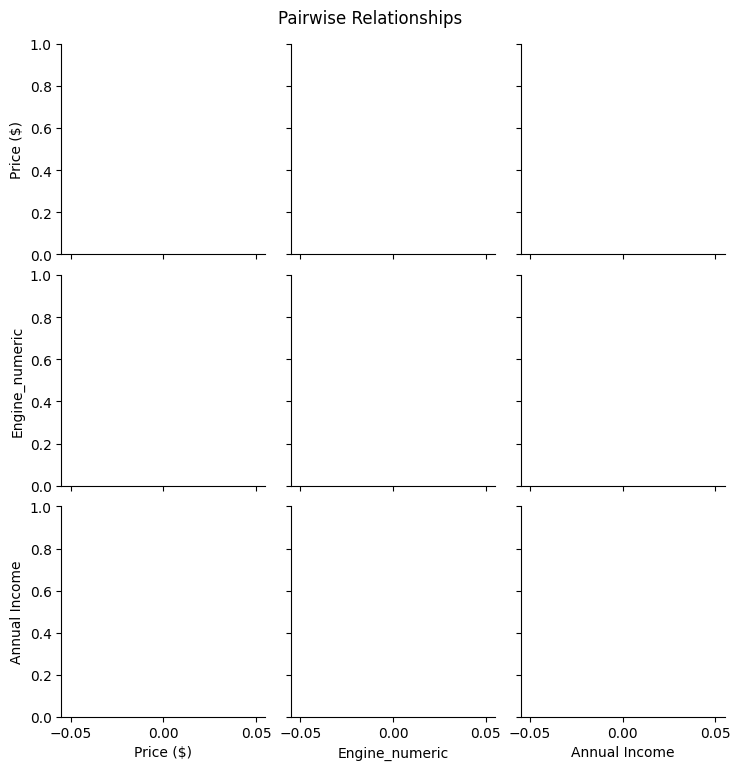

In [65]:
#Pairplot to visualize interactions

sns.pairplot(corr_df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [66]:
#Que 15  How does the average car price vary across different car models and engine types?

#Group by Model and Engine and calculate average price

avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price_model_engine.head())


    Model                     Engine     Price ($)
0   3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1  3000GT  DoubleÂ Overhead Camshaft  22764.326923
2  3000GT          Overhead Camshaft  21770.659864
3    300M  DoubleÂ Overhead Camshaft  21394.888889
4    323i  DoubleÂ Overhead Camshaft  16744.632287


In [67]:
# Create Pivot Table View
pivot = avg_price_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')
print(pivot)


Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


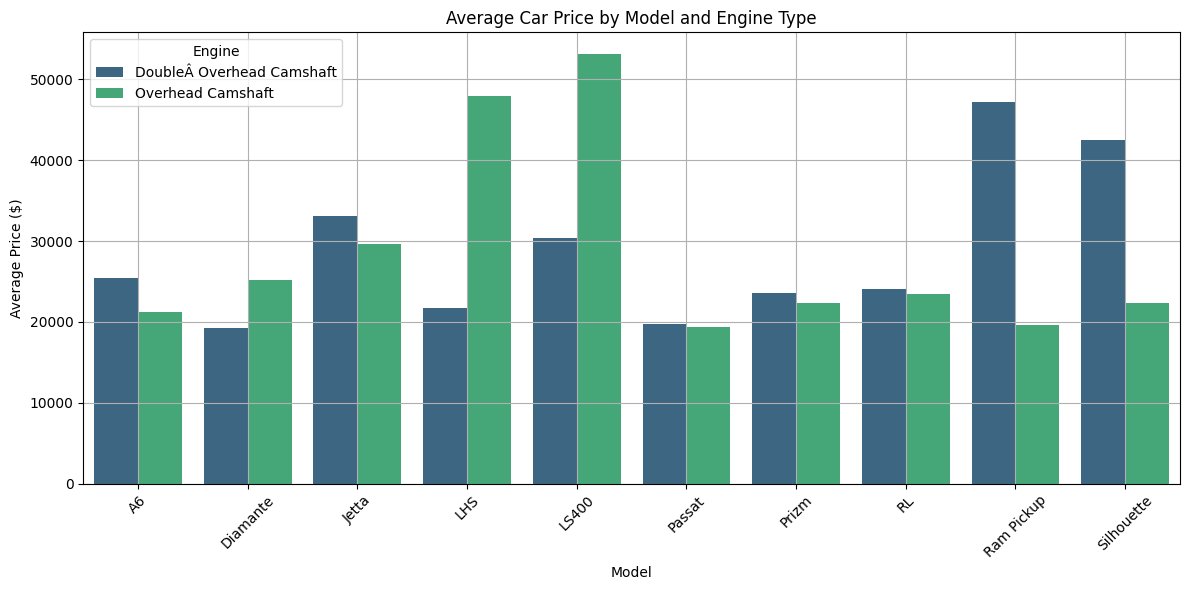

In [68]:
# Filter Top 10 most frequent models for cleaner chart
top_models = df['Model'].value_counts().nlargest(10).index
filtered_data = avg_price_model_engine[avg_price_model_engine['Model'].isin(top_models)]

# Barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Model', y='Price ($)', hue='Engine', palette='viridis')
plt.title("Average Car Price by Model and Engine Type")
plt.xticks(rotation=45)
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
